# Newton's method for logistic regression

## 1. Representation

#### 1.1. Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_X = pd.read_csv('./data/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('./data/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [3]:
df_X['label'] = ys[0].values 

<AxesSubplot:xlabel='0', ylabel='1'>

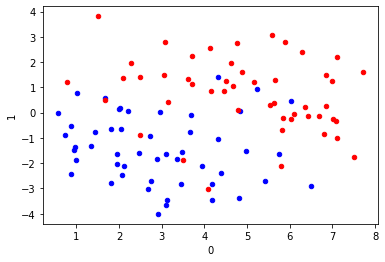

In [4]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue') #x= column name "0", y =x= column name "1" 
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

#### 1.2. Input variable

In [5]:
# The first two column of df_X
Xs = df_X[[0, 1]].values

# adding a columns of ones for the intercept terms
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) #(99,3)
# print(Xs.shape)

#### 1.3. Response variable

In [6]:
# transform dataframe to numpy.ndarray (99,)
ys = df_X['label'].values 

# print(ys.shape)

## 2. Evaluation

\begin{align*}
J(\theta) &= \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}\big(1 + e ^{-y^{(k)} \theta^T x^{(k)}}\big) \\
               &= - \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}\big(g(z^{(k)})\big)
\end{align*}

where $g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$ and $z^{(k)} = y^{(k)} \theta^T x^{(k)}$. 

For clarity, in the following derivation, $z = z^{(k)}$.

## 3. Optimization

Note that

Newton's method addresses getting to $f(\theta) = 0$, and minimizing $J(\theta)$ means getting $\frac{\partial J}{\partial \theta}$ to 0. There after applying Newton's method, extending it to multidimensional setting (Newton-Raphson method), the update rule becomes:

\begin{align*}
\theta &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}


#### 3.1 Formula

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$

$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} \big(g(z^{(k)}) - 1\big) y^{(k)} x_i^{(k)}
$$

$$
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})\big(1 - g(z^{(k)})\big) x_i^{(k)} x_j^{(k)}
$$

#### 3.2 Proof

\begin{align*}
\frac{\partial J}{\partial \theta_i} 
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} \frac{\partial g(z)}{\partial z} \frac{\partial z(\theta_i)}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} g(z) (1 - g(z)) \frac{\partial z}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} \big(1 - g(z) \big) \frac{\partial z}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} \big(1 - g(z) \big) y^{(k)} x_i^{(k)}  \\
 &= \frac{1}{m} \sum_{k=1}^{m} \big(g(z) - 1 \big) y^{(k)} x_i^{(k)}  \\
\end{align*}


Then,

\begin{align*}
H_{ij} = \frac{\partial J}{\partial \theta_i \partial \theta_j} 
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial (g(z)  - 1)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} \frac {\partial g(z)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)\big(1 - g(z)\big) \frac{\partial z}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)\big(1 - g(z)\big) y^{(k)} x_j^{(k)} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)\big(1 - g(z)\big) x_i^{(k)} x_j^{(k)} \\
\end{align*}

#### 3.3 Code

In [9]:
all_thetas = [] # collect for demonstration purpose
theta = np.zeros(Xs.shape[1])
tol = 1e9
n_iters = 0
while tol > 1e-6:
    zs = ys * Xs.dot(theta) #z value
    gzs = 1 / (1 + np.exp(-zs))  
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    # Calculating hessian
    
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
            if i != j:
                hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nabla)
    
    # Optimization
    
    old_theta = theta.copy()
    theta -= delta #subtracts right operand from the left operand and assign the result to left operand
    all_thetas.append(theta.copy()) # Record theta in each iteration
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta)) # Measure the amount of change in this iteration
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


Next step is to draw a decision boundary


$$ z=\theta_0+\theta_1x_1+\theta_2x_2$$
$$\hat{y} =  \frac{1}{1 + e^{-z}}$$


If we set the decision boundary for $\hat{y} = 0.5$


$$ z=0 $$ 
$$ z= \theta_0+\theta_1x_1+\theta_2x_2 $$
$$ 0 = \theta_0+\theta_1x_1+\theta_2x_2 $$
$$ x_2 = \frac{-\theta_0+\theta_1x_1}{\theta_2} $$

Note! We cannot draw a line like linear regression $$\hat{y}=X\theta$$

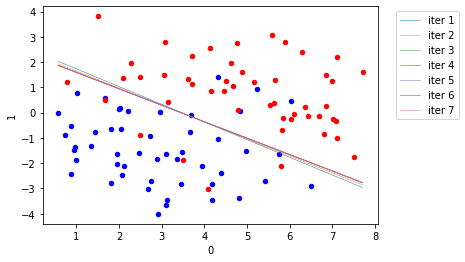

In [17]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')


x_1 = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])  

for k, theta in enumerate(all_thetas):
    boundary = (theta[0] + theta[1] * x_1) / (- theta[2]) 
    plt.plot(x_1, boundary, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Since all the lines are so close to each other, Newton's method converges very quickly, at least for this dataset.